# Notebook test pour réaliser des graphs sur des données issues de Ades

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import sys
import os
import ipywidgets as widgets
from ipywidgets import interact
from IPython.core.display import display, HTML
from IPython.display import IFrame
import numpy as np
# import plotly.graph_objects as go

dir_data='../data/'
file_data='ESU_donnees_2019-11-20.csv'
df_data=pd.read_csv(os.path.join(dir_data,file_data), sep=';', encoding='utf-8', parse_dates=[10], low_memory=False)
list_station=list(set(df_data['code_station']))
list_param=list(set(df_data['code_parametre']))


In [57]:
station=widgets.Dropdown(
    options=list_station,
    description='Station:',
    disabled=False,
)
parametre=widgets.Dropdown(
    options=list_param,
#     options=os.listdir(os.path.join(dir_to_start_with, directory.value)),
    description='Paramètre:',
    disabled=False,
)


def update_parametre(*args):
    list_to_update=list(set(df_data.loc[df_data['code_station']==station.value,'code_parametre']))
#     list_to_update=list_param
    if len(list_to_update)==0:
        parametre.options=['None']
    else:
        parametre.options=list_to_update

station.observe(update_parametre, 'value')

def print_the_size(my_station,param, *args):
    if param is not None:
        size=df_data.loc[(df_data['code_station']==my_station) & (df_data['code_parametre']==param),].shape
#         size=10
        print(f'Pour la station séléctionnée {my_station}, et le paramètre {param}, il existe : {size} lignes/colonnes')
        sub_data=df_data.loc[(df_data['code_station']==my_station) & (df_data['code_parametre']==param),]
        x=sub_data['date_prelevement']
        y=sub_data['resultat']

        fig=plt.figure()
        plt.plot(x,y)
        plt.show()
        return my_station, param
    else:
        print('Nothing to display here...')
        
interact(print_the_size, my_station=station, param=parametre)



interactive(children=(Dropdown(description='Station:', options=(4050400, 4054400, 4444002, 4448003, 4067300, 4…

<function __main__.print_the_size(my_station, param, *args)>

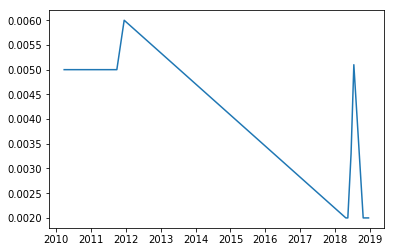

In [58]:
sub_data=df_data.loc[(df_data['code_station']==4050400) & (df_data['code_parametre']==1537),]
x=sub_data['date_prelevement']
y=sub_data['resultat']

fig=plt.figure()
plt.plot(x,y)
plt.show()
# fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers'))
# fig.show()